<h1><center> Temperature Fluctuations </center></h1>

## Import libraries and data

In [1]:
# for data handling
import numpy as np 
import pandas as pd

# for static graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# for interactive graphs
import plotly_express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

# Codes for extracting plotly graphs
import chart_studio

#username = "xxxx"
#api_key = "xxxx"

#chart_studio.tools.set_credentials_file(username=username, api_key= api_key )
import chart_studio.plotly as py
import chart_studio.tools as tls

Source of data: https://www.fao.org/faostat/en/#data/ET

In [2]:
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")

In [3]:

temp = pd.read_csv("temperature_change_data_11-29-2021.csv")

# Clean data - exclude unnecessary data and make minor alterations for improved readability
temp.drop(temp[temp["Value"].isnull()].index, axis = 0, inplace = True)

temp = temp[temp["Months"]=="Meteorological year"]
x = ["Area Code (ISO3)", "Domain Code","Domain","Element Code","Months Code","Year Code", "Months", "Flag Description", "Flag"]
temp.drop( x, inplace = True, axis =1)
temp.rename(columns = {"Area": "Country"}, inplace = True)

#Transforming the dataset for use later in the project
df_group = temp.groupby(["Country", "Year"])["Value"].mean().reset_index()
temp.head()

Country             Element  Year Unit  Value
240  Afghanistan  Temperature change  1961   °C -0.121
241  Afghanistan  Temperature change  1962   °C -0.171
242  Afghanistan  Temperature change  1963   °C  0.841
243  Afghanistan  Temperature change  1964   °C -0.779
244  Afghanistan  Temperature change  1965   °C -0.254

## Global temperature fluctuations. 

In [4]:
#Restructure data for visualisation
Global = temp.groupby("Year")["Value"].mean().reset_index()

#Construct visualisation 
fig = px.line(Global, x="Year", y = "Value", markers=True,  title = "Global temperature fluctuation between 1961 to 2020 (interactive)")

#Customisation
fig.add_hline(0, line_width = 1, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(
    text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


#extracting plotly graphs 
#py.plot(fig, filename = "Global temperature fluctuation between 1961 to 2020 (interactive)", auto_open = False)

fig.show()

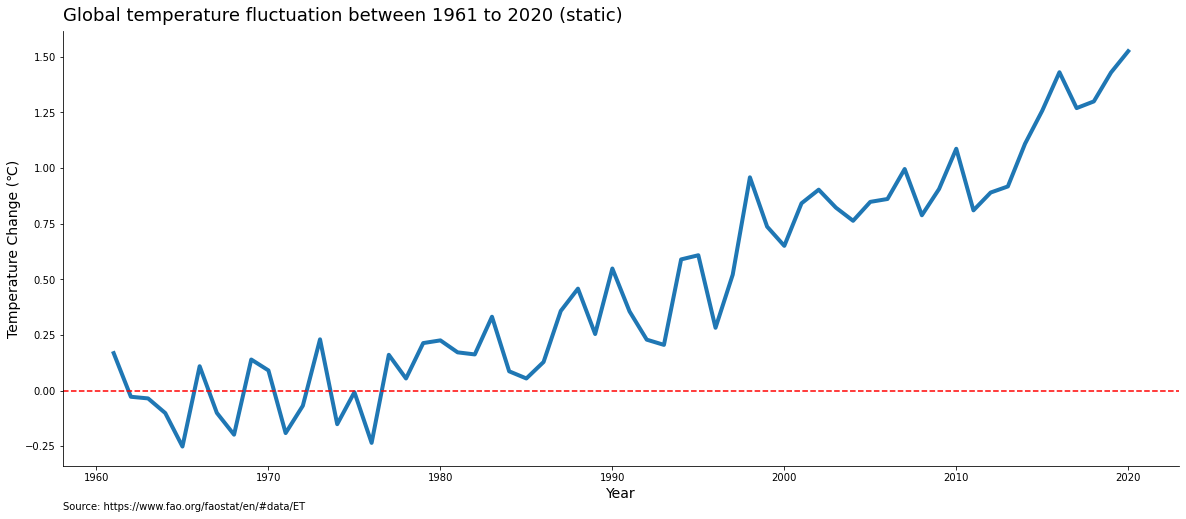

In [5]:
#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot(x = "Year",  y = "Value", data = Global, lw = 4)

#Customisation
plt.axhline(0, ls = "--", color = "red")
plt.title("Global temperature fluctuation between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

In [6]:
#Construct visualisation 
fig = px.bar(Global, x = "Year", y = "Value", title = "Global temperature fluctuation between 1961 to 2020 (interactive)")

#Customisation
fig.add_vline(1977, line_width = 1, line_dash = "dot")
fig.add_vrect(x0=1960, x1=1977, fillcolor = "grey", opacity=0.3 )

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")

#extracting plotly graphs 
#py.plot(fig, filename =  "Global temperature fluctuation between 1961 to 2020 (interactive)", auto_open = False)



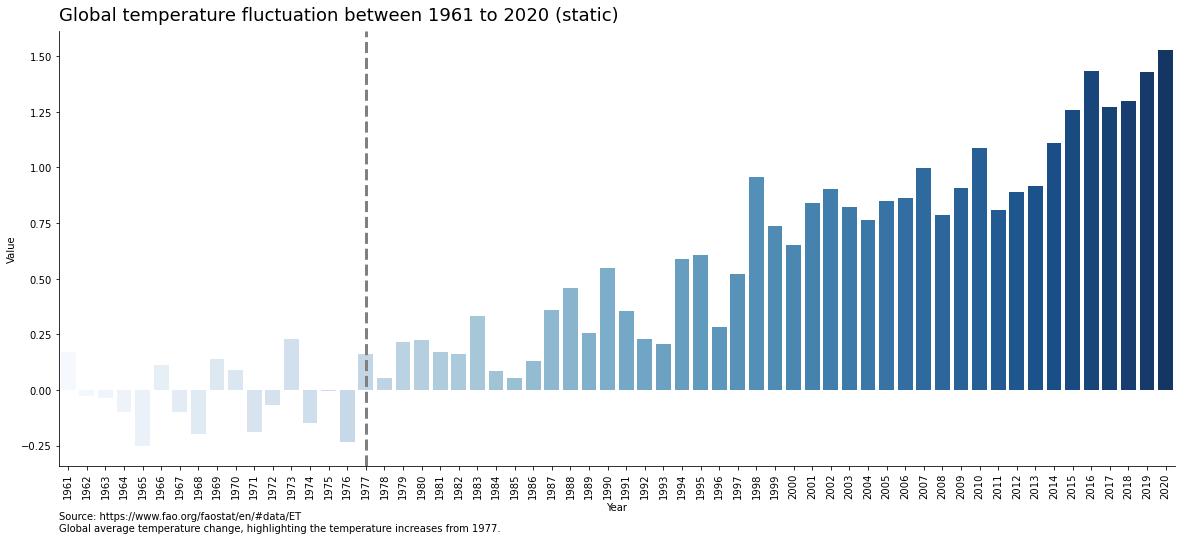

In [7]:
#Construct visualisation 
plt.figure(figsize=(20,8))
fig = sns.barplot(x ="Year", y = "Value", data = Global, palette = "Blues")

#Customisation
plt.axvline(16, ls = "--", color = "grey", lw= 3)
fig.tick_params(axis='x', rotation=90)
plt.title("Global temperature fluctuation between 1961 to 2020 (static)", fontsize = 18, loc='left',   y = 1.01)

plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET \nGlobal average temperature change, highlighting the temperature increases from 1977. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

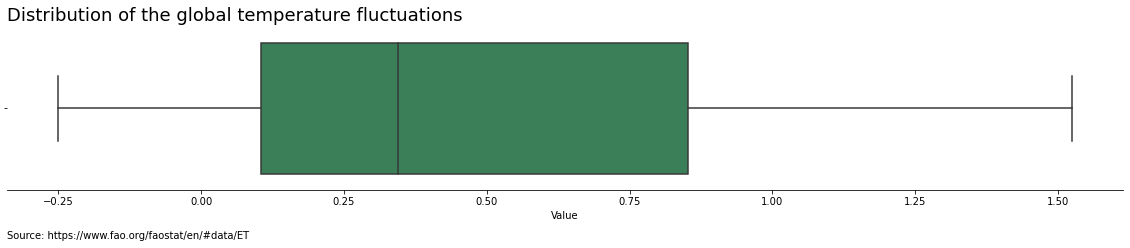

In [8]:
#Construct visualisation 
plt.figure(figsize=(20,3))
sns.boxplot( x = "Value", data =Global, color = "seagreen")

#Customisation
plt.title("Distribution of the global temperature fluctuations", fontsize = 18,loc='left',  y = 1.01)
plt.title("Distribution of the global temperature fluctuations", fontsize = 18,loc='left')
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.3), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = True, bottom = False)

## Regional temperature fluctuations

### G7

In [9]:
#Restructure data for visualisation
df_group["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "UK", inplace= True)
df_group["Country"].replace("United States of America", "USA", inplace= True)

g7_countries = ( "UK", "USA", "Canada", "Japan", "Germany", "France", "Italy")

g7 = df_group[df_group['Country'].isin(g7_countries)]
G7Overview = g7.groupby("Year")["Value"].mean().reset_index()


In [10]:
#Construct visualisation 
fig =px.line(G7Overview, x="Year", y= "Value", title = "Temperature fluctuations for the G7 nations between 1961 to 2020 (interactive)" )

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET")
    , showarrow = False, x = 0, y = -0.15, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
    xshift =-1, yshift =-5, font=dict(size=10, color = "grey"), align = "left")
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")
fig.show()

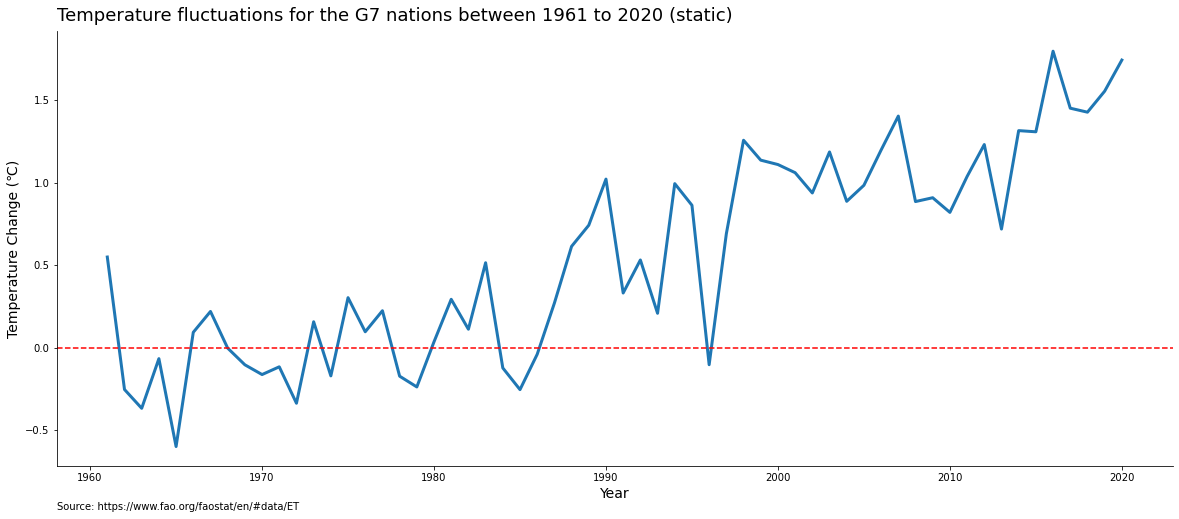

In [11]:
#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot( x="Year", y= "Value", data = G7Overview, lw = 3)

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuations for the G7 nations between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

plt.show()

In [12]:
#Construct visualisation 
fig = px.line(g7, x="Year", y = "Value", color = "Country", title = "Temperature fluctuations for individual G7 nations between 1961 to 2020")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow=False, x = 0, y = -0.15,
    xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5,
    font=dict(size=10, color="grey"), align="left")
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")



#extracting plotly graphs 
#py.plot(fig, filename = "Temperature fluctuations for individual G7 nations between 1961 to 2020", auto_open = False)

fig.show()

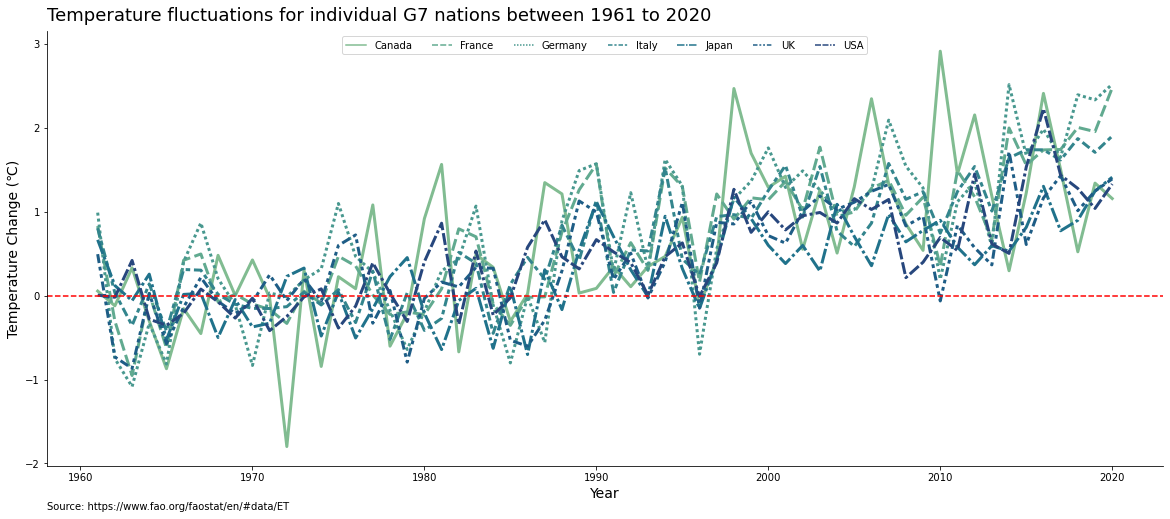

In [13]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x="Year", y = "Value", hue = "Country", data = g7, lw = 3, style = "Country", palette = "crest")

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuations for individual G7 nations between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc="upper center", ncol = len(g7["Country"]) )

plt.show()

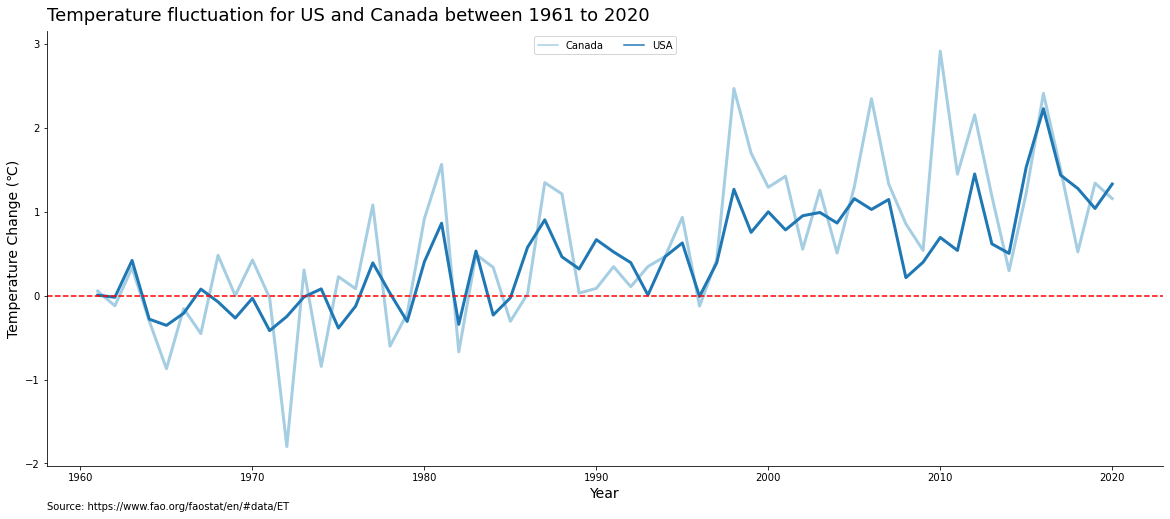

In [14]:
#Restructure data for visualisation
data = g7[g7["Country"].isin(("USA", "Canada"))]

#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot(data = data, x="Year", y = "Value", hue = "Country", lw=3, palette = "Paired")


#Customisation
plt.title("Temperature fluctuation for US and Canada between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.axhline(0, ls = "--", color = "red")
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc="upper center", ncol = len(data["Country"]) )

sns.despine(top = True, right = True, left = False, bottom = False)

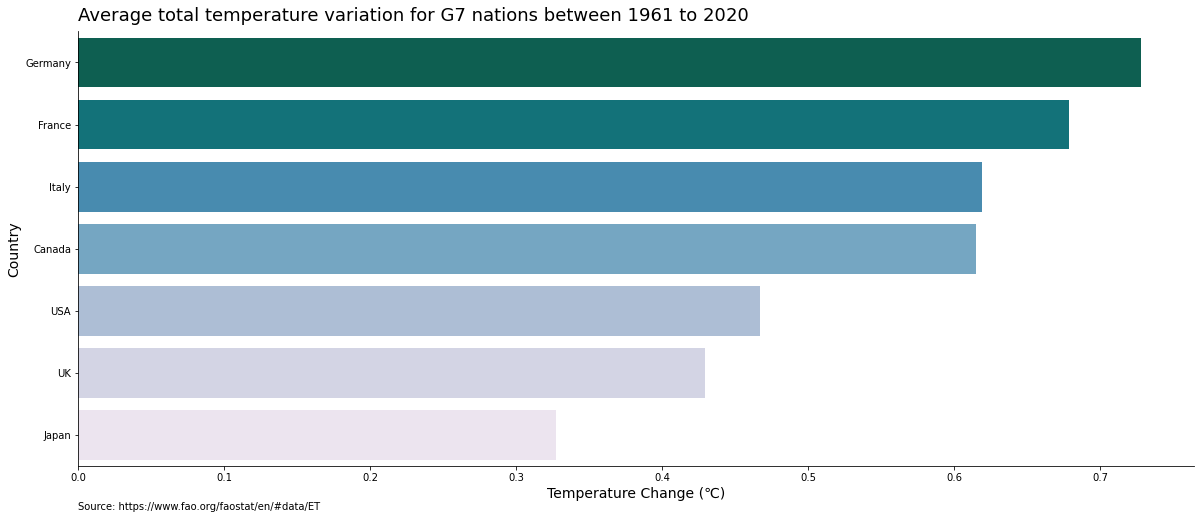

In [15]:
#Restructure data for visualisation
g7_pivot = pd.pivot_table(g7, index = ["Country"], columns=["Year"], values = ["Value"])
g7_pivot["Total variation"] = g7_pivot.mean(axis=1)
g7_pivot.reset_index(inplace = True)

#Construct visualisation 
plt.figure(figsize= (20,8))
sns.barplot(y = "Country", x = "Total variation", data =g7_pivot, palette = "PuBuGn_r", order = g7_pivot.sort_values("Total variation", ascending = False)["Country"])

#Customisation
plt.title("Average total temperature variation for G7 nations between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)


plt.ylabel("Country", fontsize=14)
plt.xlabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

### South America 

In [16]:
South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","French Guyana",
                 "Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"]
# https://www.britannica.com/topic/list-of-countries-in-Latin-America-2061416

In [17]:
#Restructure data for visualisation

SA = temp[temp["Country"].isin(["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","French Guyana",
                 "Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"])]

SA = SA.groupby("Year")["Value"].mean().reset_index()

#Construct visualisation 
fig =px.line(SA, x="Year", y= "Value",  title = "Temperature fluctuation for South American between 1961 to 2020 (interactive)")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")

fig.show()

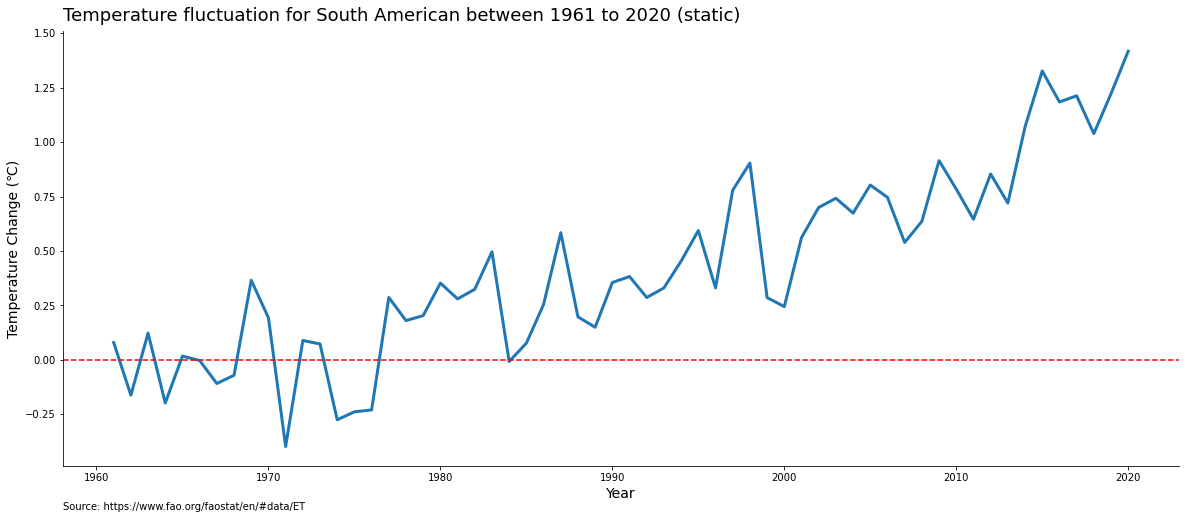

In [18]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x = "Year", y = "Value", data = SA, markers = "o", lw = 3)

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuation for South American between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

In [19]:
#Restructure data for visualisation
South_America = df_group[df_group['Country'].isin(South_America)]

#Construct visualisation 
fig = px.line(South_America, x="Year", y = "Value", color = "Country",
        title = "Temperature fluctuation for South American countries between 1961 to 2020 (interactive)",)

#Customisation
fig.add_hline(0, line_width = 1, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")


#extracting plotly graphs 
#py.plot(fig, filename = "Temperature fluctuation for South American countries between 1961 to 2020 (interactive)", auto_open = False)

fig.show()

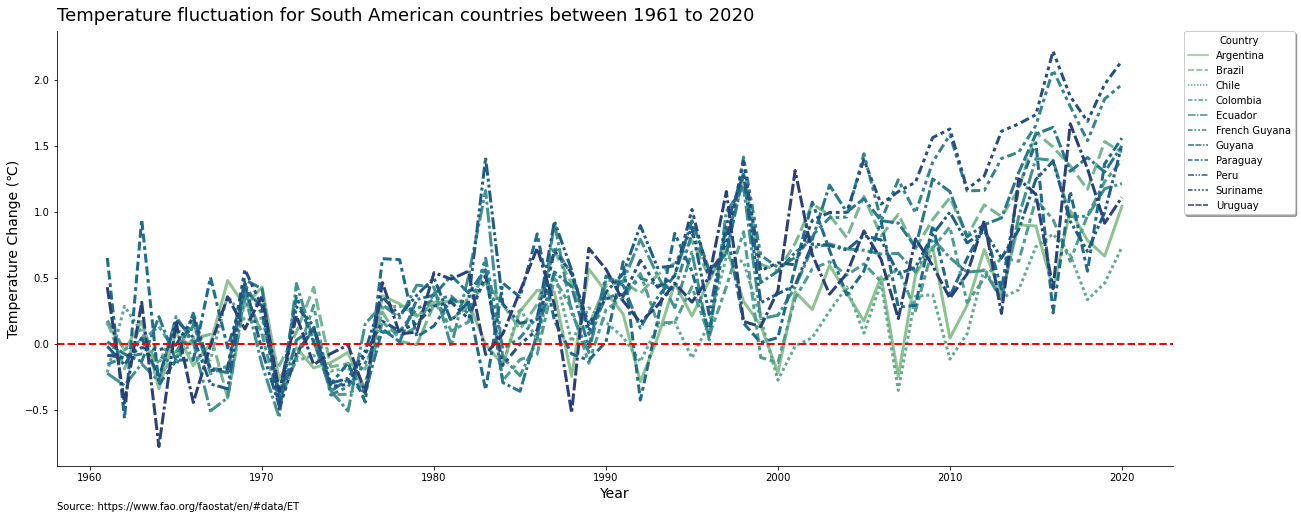

In [20]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x="Year", y = "Value", data = South_America, hue = "Country", lw = 3, style = "Country", palette = "crest")

#Customisation
plt.axhline(0, ls = "--", color = "red", lw = 2)

plt.title("Temperature fluctuation for South American countries between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, shadow = 1)


plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

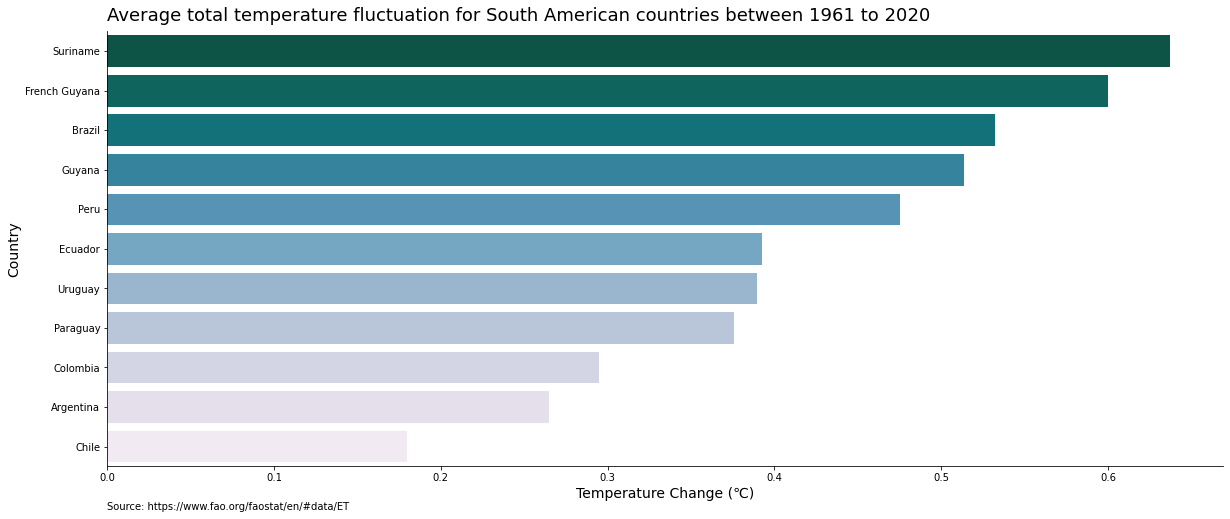

In [21]:
#Restructure data for visualisation
South_America_pivot = pd.pivot_table(South_America, index = ["Country"], columns=["Year"], values = ["Value"])
South_America_pivot["Total variation"] = South_America_pivot.mean(axis=1)
South_America_pivot.reset_index(inplace = True)

#Construct visualisation 
plt.figure(figsize= (20,8))
sns.barplot(y = "Country", x = "Total variation", data =South_America_pivot, 
            palette = "PuBuGn_r", order = South_America_pivot.sort_values("Total variation", ascending = False)["Country"])

#Customisation
plt.ylabel("Country", fontsize=14)
plt.xlabel("Temperature Change (℃)", fontsize=14)

plt.title("Average total temperature fluctuation for South American countries between 1961 to 2020", 
          fontsize = 18, loc='left', y = 1.01)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

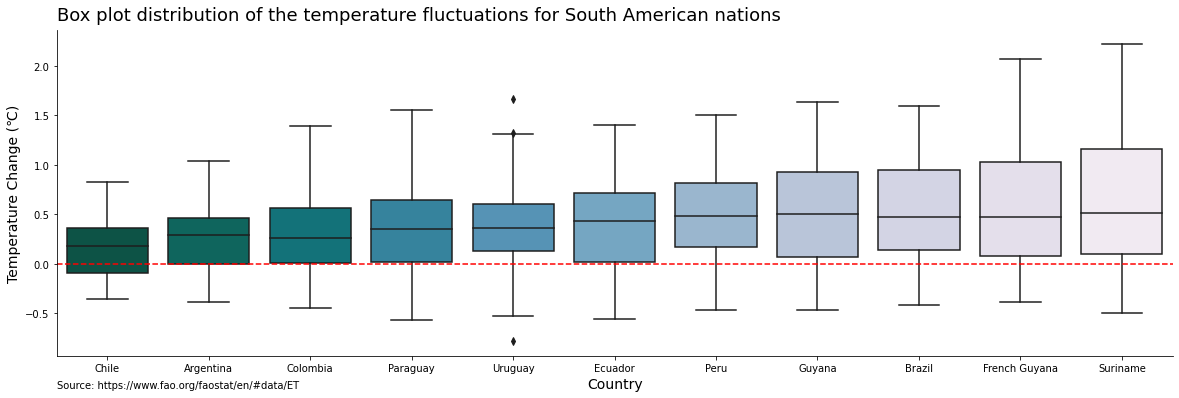

In [22]:
#Construct visualisation 
plt.figure(figsize= (20,6))
sns.boxplot(x = "Country", y = "Value", data = South_America, palette = "PuBuGn_r", 
            order = South_America_pivot.sort_values("Total variation", ascending = True)["Country"])

#Customisation
plt.axhline(0, ls = "--", color = "red")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)

plt.title("Box plot distribution of the temperature fluctuations for South American nations", fontsize = 18, loc='left', y = 1.01)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

## World temperature changes

In [23]:
df_pivot = pd.pivot_table(df_group, index = ["Country"], columns=["Year"], values = ["Value"])
df_pivot["Total variation"] = df_pivot.mean(axis=1)
df_pivot.reset_index(inplace = True)


data = dict(
        type = 'choropleth',
        colorscale = 'temps',
        reversescale = False,
        locations = df_pivot["Country"],
        locationmode = "country names",
        z = df_pivot['Total variation'],
        text = df_pivot["Country"],
        colorbar = {'title' : 'Total variation'},
      ) 

layout = dict(title = 'Choromap of average temperature for countries between 1961 to 2020', geo = dict(showframe = False, projection = {'type':'mercator'})
             )

In [24]:
choromap = go.Figure(data = [data],layout = layout)
choromap.update_layout(height = 650, width = 1000)
choromap

#py.plot(choromap, filename = "Choromap of average temperature for countries between 1961 to 2020", auto_open = False)


In [25]:
df = px.data.gapminder()
fig = px.choropleth(df_group , locations = df_group["Country"], locationmode = "country names", 
                    color="Value", hover_name="Value", animation_frame="Year",
                    range_color=[-4,5], title = "Animated graph of global temperature fluctuations between 1961 to 2020", color_continuous_scale = 'magma', height = 500, width = 1000)

py.plot(fig, filename = "Animated graph of global temperature fluctuations between 1961 to 2020", auto_open = False)
fig.show()

## Appendix 
As alluded in the body of the project, the appendix is divided into two sections. The first is a review of the individual elements of the dataset which were taken as granted. The second is some additional resources for those who wish to review a specific nation and its temperature fluctuation. 

### Understanding the dataset

In [26]:
data = pd.read_csv("temperature_change_data_11-29-2021.csv")
data.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67625 entries, 0 to 67624
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       67625 non-null  object 
 1   Domain            67625 non-null  object 
 2   Area Code (ISO3)  67625 non-null  object 
 3   Area              67625 non-null  object 
 4   Element Code      67625 non-null  int64  
 5   Element           67625 non-null  object 
 6   Months Code       67625 non-null  int64  
 7   Months            67625 non-null  object 
 8   Year Code         67625 non-null  int64  
 9   Year              67625 non-null  int64  
 10  Unit              67625 non-null  object 
 11  Value             65331 non-null  float64
 12  Flag              67625 non-null  object 
 13  Flag Description  67625 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 7.2+ MB


In [28]:
data[data["Value"].isnull()].head()

Domain Code              Domain Area Code (ISO3)            Area  \
937           ET  Temperature change              ASM  American Samoa   
949           ET  Temperature change              ASM  American Samoa   
996           ET  Temperature change              ASM  American Samoa   
997           ET  Temperature change              ASM  American Samoa   
1056          ET  Temperature change              ASM  American Samoa   

      Element Code             Element  Months Code       Months  Year Code  \
937           7271  Temperature change         7016  Dec–Jan–Feb       1998   
949           7271  Temperature change         7016  Dec–Jan–Feb       2010   
996           7271  Temperature change         7017  Mar–Apr–May       1997   
997           7271  Temperature change         7017  Mar–Apr–May       1998   
1056          7271  Temperature change         7018  Jun–Jul–Aug       1997   

      Year Unit  Value Flag    Flag Description  
937   1998   °C    NaN   NV  Data not available  
949   2010   °C    NaN   NV  Data not available  
996   1997   °C    NaN   NV  Data not available  
997   1998   °C    NaN   NV  Data not available  
1056  1997   °C    NaN   NV  Data not available

In [29]:
x = ((data["Value"].isnull().sum()/len(data))*100).round(1)

print ("Approx", x, "% of data in the Value variable are null values.")

Approx 3.4 % of data in the Value variable are null values.


In [30]:
data.drop(data[data["Value"].isnull()].index, axis = 0, inplace = True)

#### Time variables 

In [31]:
data["Months"].value_counts()

Dec–Jan–Feb            13080
Mar–Apr–May            13077
Jun–Jul–Aug            13069
Sep–Oct–Nov            13061
Meteorological year    13044
Name: Months, dtype: int64

In [32]:
data = data[data["Months"]=="Meteorological year"]

In [33]:
df_group = data.groupby(["Area", "Year"])["Value"].mean().reset_index()

print ("Oldest entry - ", df_group["Year"].min())

Oldest entry -  1961


In [34]:
print ("Newest entry - ", df_group["Year"].max())

Newest entry -  2020


In [35]:
x = df_group["Year"].to_numpy()
print ( "The dataset contains records for", np.ptp(x), "years, starting from", df_group["Year"].min(), "to", df_group["Year"].max())

The dataset contains records for 59 years, starting from 1961 to 2020


In [36]:
x = (df_group["Year"].max() +1) - df_group["Year"].min() == df_group["Year"].nunique()

print( "Are there Values for for every year between 1961 and 2020?", x)

Are there Values for for every year between 1961 and 2020? True


#### Area

In [37]:
data["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [38]:
data.rename(columns = {"Area": "Country"}, inplace = True)

In [39]:
x = data[data["Country"]== "USSR"]["Year"].max()
print ("Most recent record for USSR is", x)

Most recent record for USSR is 1991


In [40]:
data["Country"].value_counts()

Afghanistan              60
Mali                     60
Martinique               60
Mauritania               60
Mauritius                60
                         ..
Montenegro               15
Serbia                   15
Serbia and Montenegro    14
Sudan                    10
South Sudan              10
Name: Country, Length: 247, dtype: int64

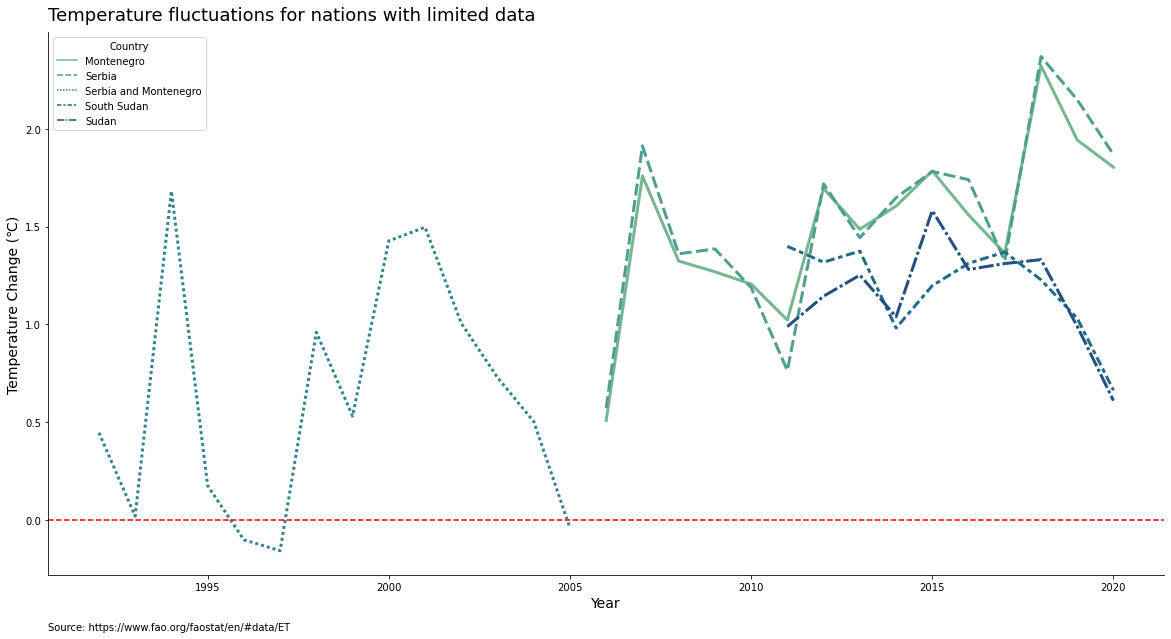

In [41]:
#Restructure data for visualisation
limited_values = data["Area Code (ISO3)"].value_counts().tail().rename_axis('Country').reset_index(name='counts')
limited_values = data[data['Area Code (ISO3)'].isin(limited_values["Country"])]

#Construct visualisation 
plt.figure(figsize =(20,10))
sns.lineplot(data = limited_values, x="Year", y = "Value", hue = "Country", palette = "crest",style = "Country", lw= 3)

#Customisation
plt.title("Temperature fluctuations for nations with limited data", fontsize = 18, loc='left', y = 1.01)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)

plt.axhline(0, ls = "--", color = "red")
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

#### Value 

In [42]:
data["Value"].describe()

count    13044.000000
mean         0.491651
std          0.649765
min         -3.251000
25%          0.032000
50%          0.415500
75%          0.882000
max          5.328000
Name: Value, dtype: float64

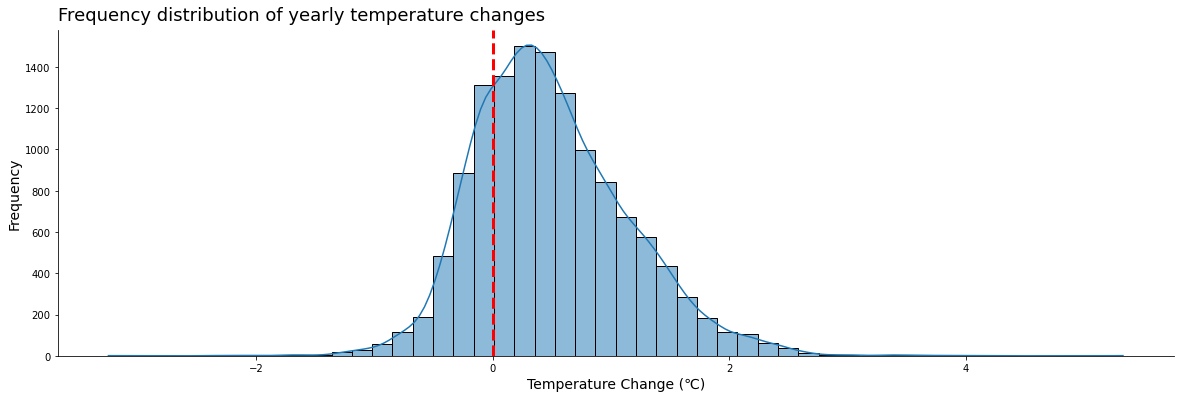

In [43]:
#Construct visualisation 
plt.figure(figsize = (20,6)) 
fig = sns.histplot(x = "Value", data = data, kde= True, bins = 50,)

#Customisation
plt.title("Frequency distribution of yearly temperature changes", fontsize = 18, loc='left', y = 1.01)
plt.axvline(0, ls = "--", color = "red", lw= 3)

plt.xlabel("Temperature Change (℃)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
sns.despine(top = True, right = True, left = False, bottom = False)

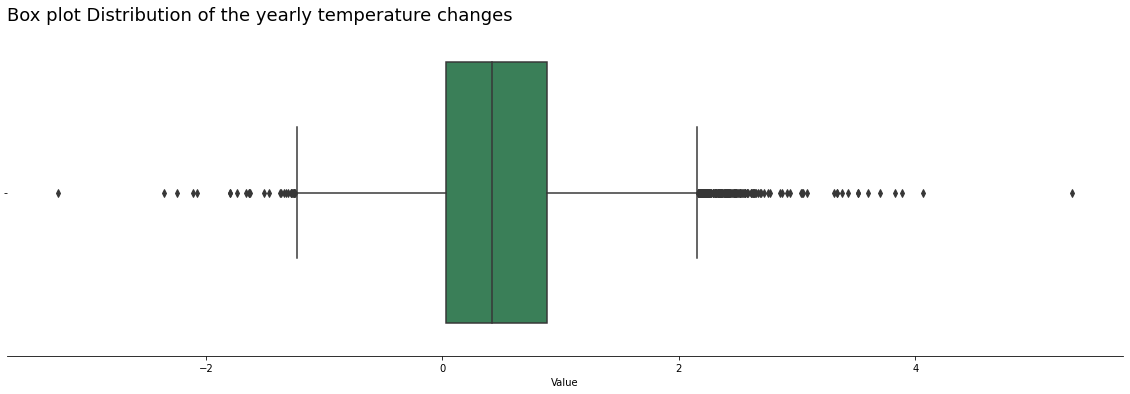

In [44]:
#Construct visualisation 
plt.figure(figsize = (20,6)) 
sns.boxplot(x = "Value", data = data, color = "seagreen")

#Customisation
plt.title("Box plot Distribution of the yearly temperature changes", fontsize = 18, loc='left', y = 1.01)
sns.despine(top = True, right = True, left = True, bottom = False)

#### Other variables

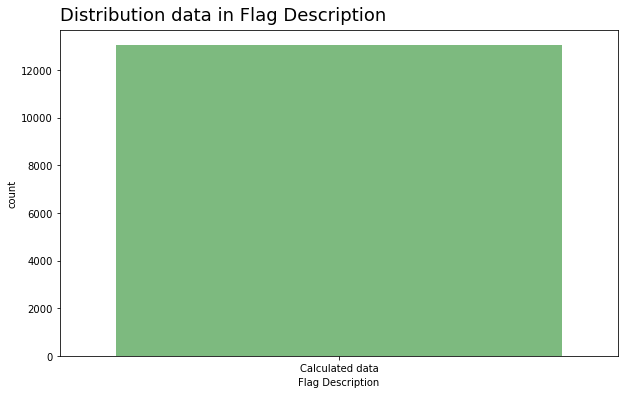

In [45]:
#Construct visualisation 
plt.figure(figsize=(10,6))
sns.countplot(x = "Flag Description", data= data, palette = "Greens")

#Customisation
plt.title("Distribution data in Flag Description", fontsize = 18, loc='left', y = 1.01)

plt.show()

In [46]:
data["Unit"].unique()

array(['°C'], dtype=object)

### Global temperature fluctuations for all nations 

In [47]:
#Restructure data for visualisation
df_group = data.groupby(["Country", "Year"])["Value"].mean().reset_index()

#Construct visualisation 
fig = px.line(df_group, x="Year", y = "Value", color = "Country", height = 600, width = 1000, title = "Global temperature fluctuation of countries between 1961 to 2020")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')


py.plot(fig, filename = "Global temperature fluctuation of countries between 1961 to 2020", auto_open = False)
fig.show()

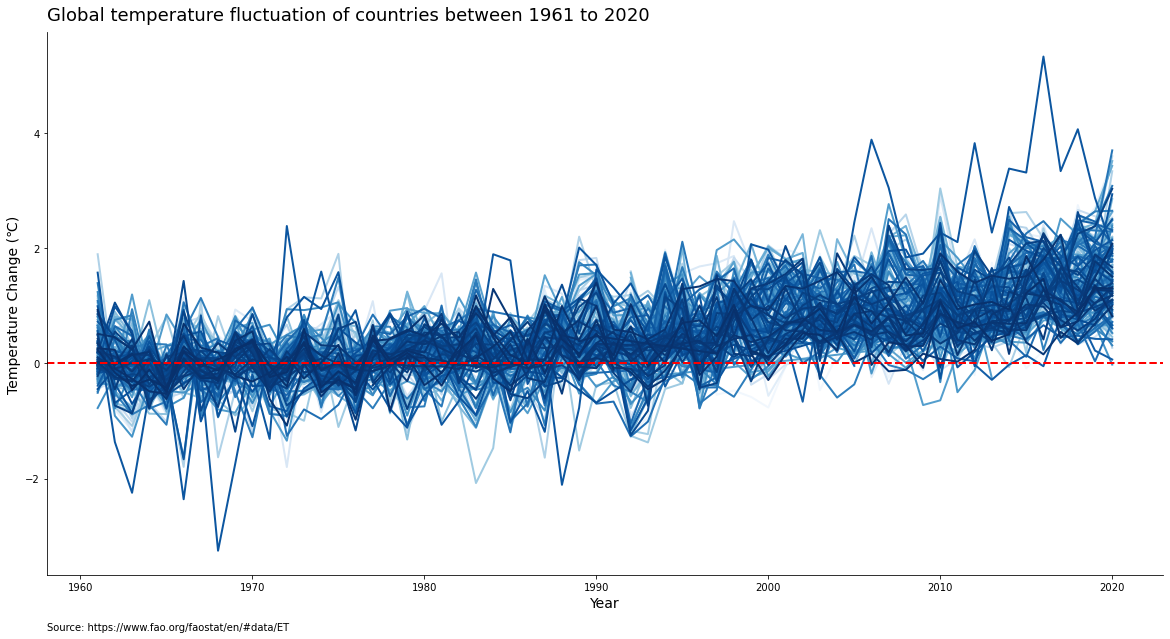

In [48]:
#Construct visualisation 
plt.figure(figsize = (20,10))
fig = sns.lineplot( x="Year", y = "Value", data = df_group, hue = "Country", palette = "Blues", lw =2) 

#Customisation
plt.title("Global temperature fluctuation of countries between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)

plt.axhline(0, ls = "--", color = "red", lw =2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
fig.get_legend().remove()

plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)